In [84]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import binned_statistic_2d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from maps import data_loader
from utils import load_datasets
import matplotlib.colors as colors
from astropy.table import Table
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.linewidth']= 3
plt.rcParams['xtick.major.size'] =8
plt.rcParams['ytick.major.size'] =8
plt.rcParams['xtick.minor.size'] =4
plt.rcParams['ytick.minor.size'] =4
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['font.size'] = 35
plt.rcParams['figure.figsize'] = (12,12)

In [85]:
SDSS, TNG50, TNG, Illustris = load_datasets(orig=True)

In [86]:
model1 = '/scratch/lzanisi/pixel-cnn/trained/0.03_0.055/asinh_SDSS_blobsLike_0.03_0.055_new/1Msteps/pixelcnn_out'
model2 ='/scratch/lzanisi/pixel-cnn/trained/0.03_0.055/asinh_NewSersicBlobs_SerOnly_0.03_0.055_new/800ksteps/pixelcnn_out'

loader = data_loader(dataset='SDSS', model=model1,model2=model2)
dataSDSS,ids_SDSS = loader.load(map_type='data_rot')
LLR_SDSS, ids_SDSS =loader.load(map_type='LLR')

loader = data_loader(dataset='Illustris', model=model1,model2=model2)
dataIllustris,ids_Illustris = loader.load(map_type='data_rot')
LLR_Illustris, _ =loader.load(map_type='LLR')

loader = data_loader(dataset='TNG', model=model1,model2=model2)
dataTNG,ids_TNG = loader.load(map_type='data_rot')
LLR_TNG, _ =loader.load(map_type='LLR')

loader = data_loader(dataset='TNG50', model=model1,model2=model2)
data50,ids_TNG50= loader.load(map_type='data_rot')
LLR_TNG50, _ =loader.load(map_type='LLR')

1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
asinh_NewSersicBlobs_SerOnly_0.03_0.055_new 800ksteps
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
asinh_NewSersicBlobs_SerOnly_0.03_0.055_new 800ksteps
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
asinh_NewSersicBlobs_SerOnly_0.03_0.055_new 800ksteps
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
1Msteps asinh_SDSS_blobsLike_0.03_0.055_new
asinh_NewSersicBlobs_SerOnly_0.03_0.055_new 800ksteps


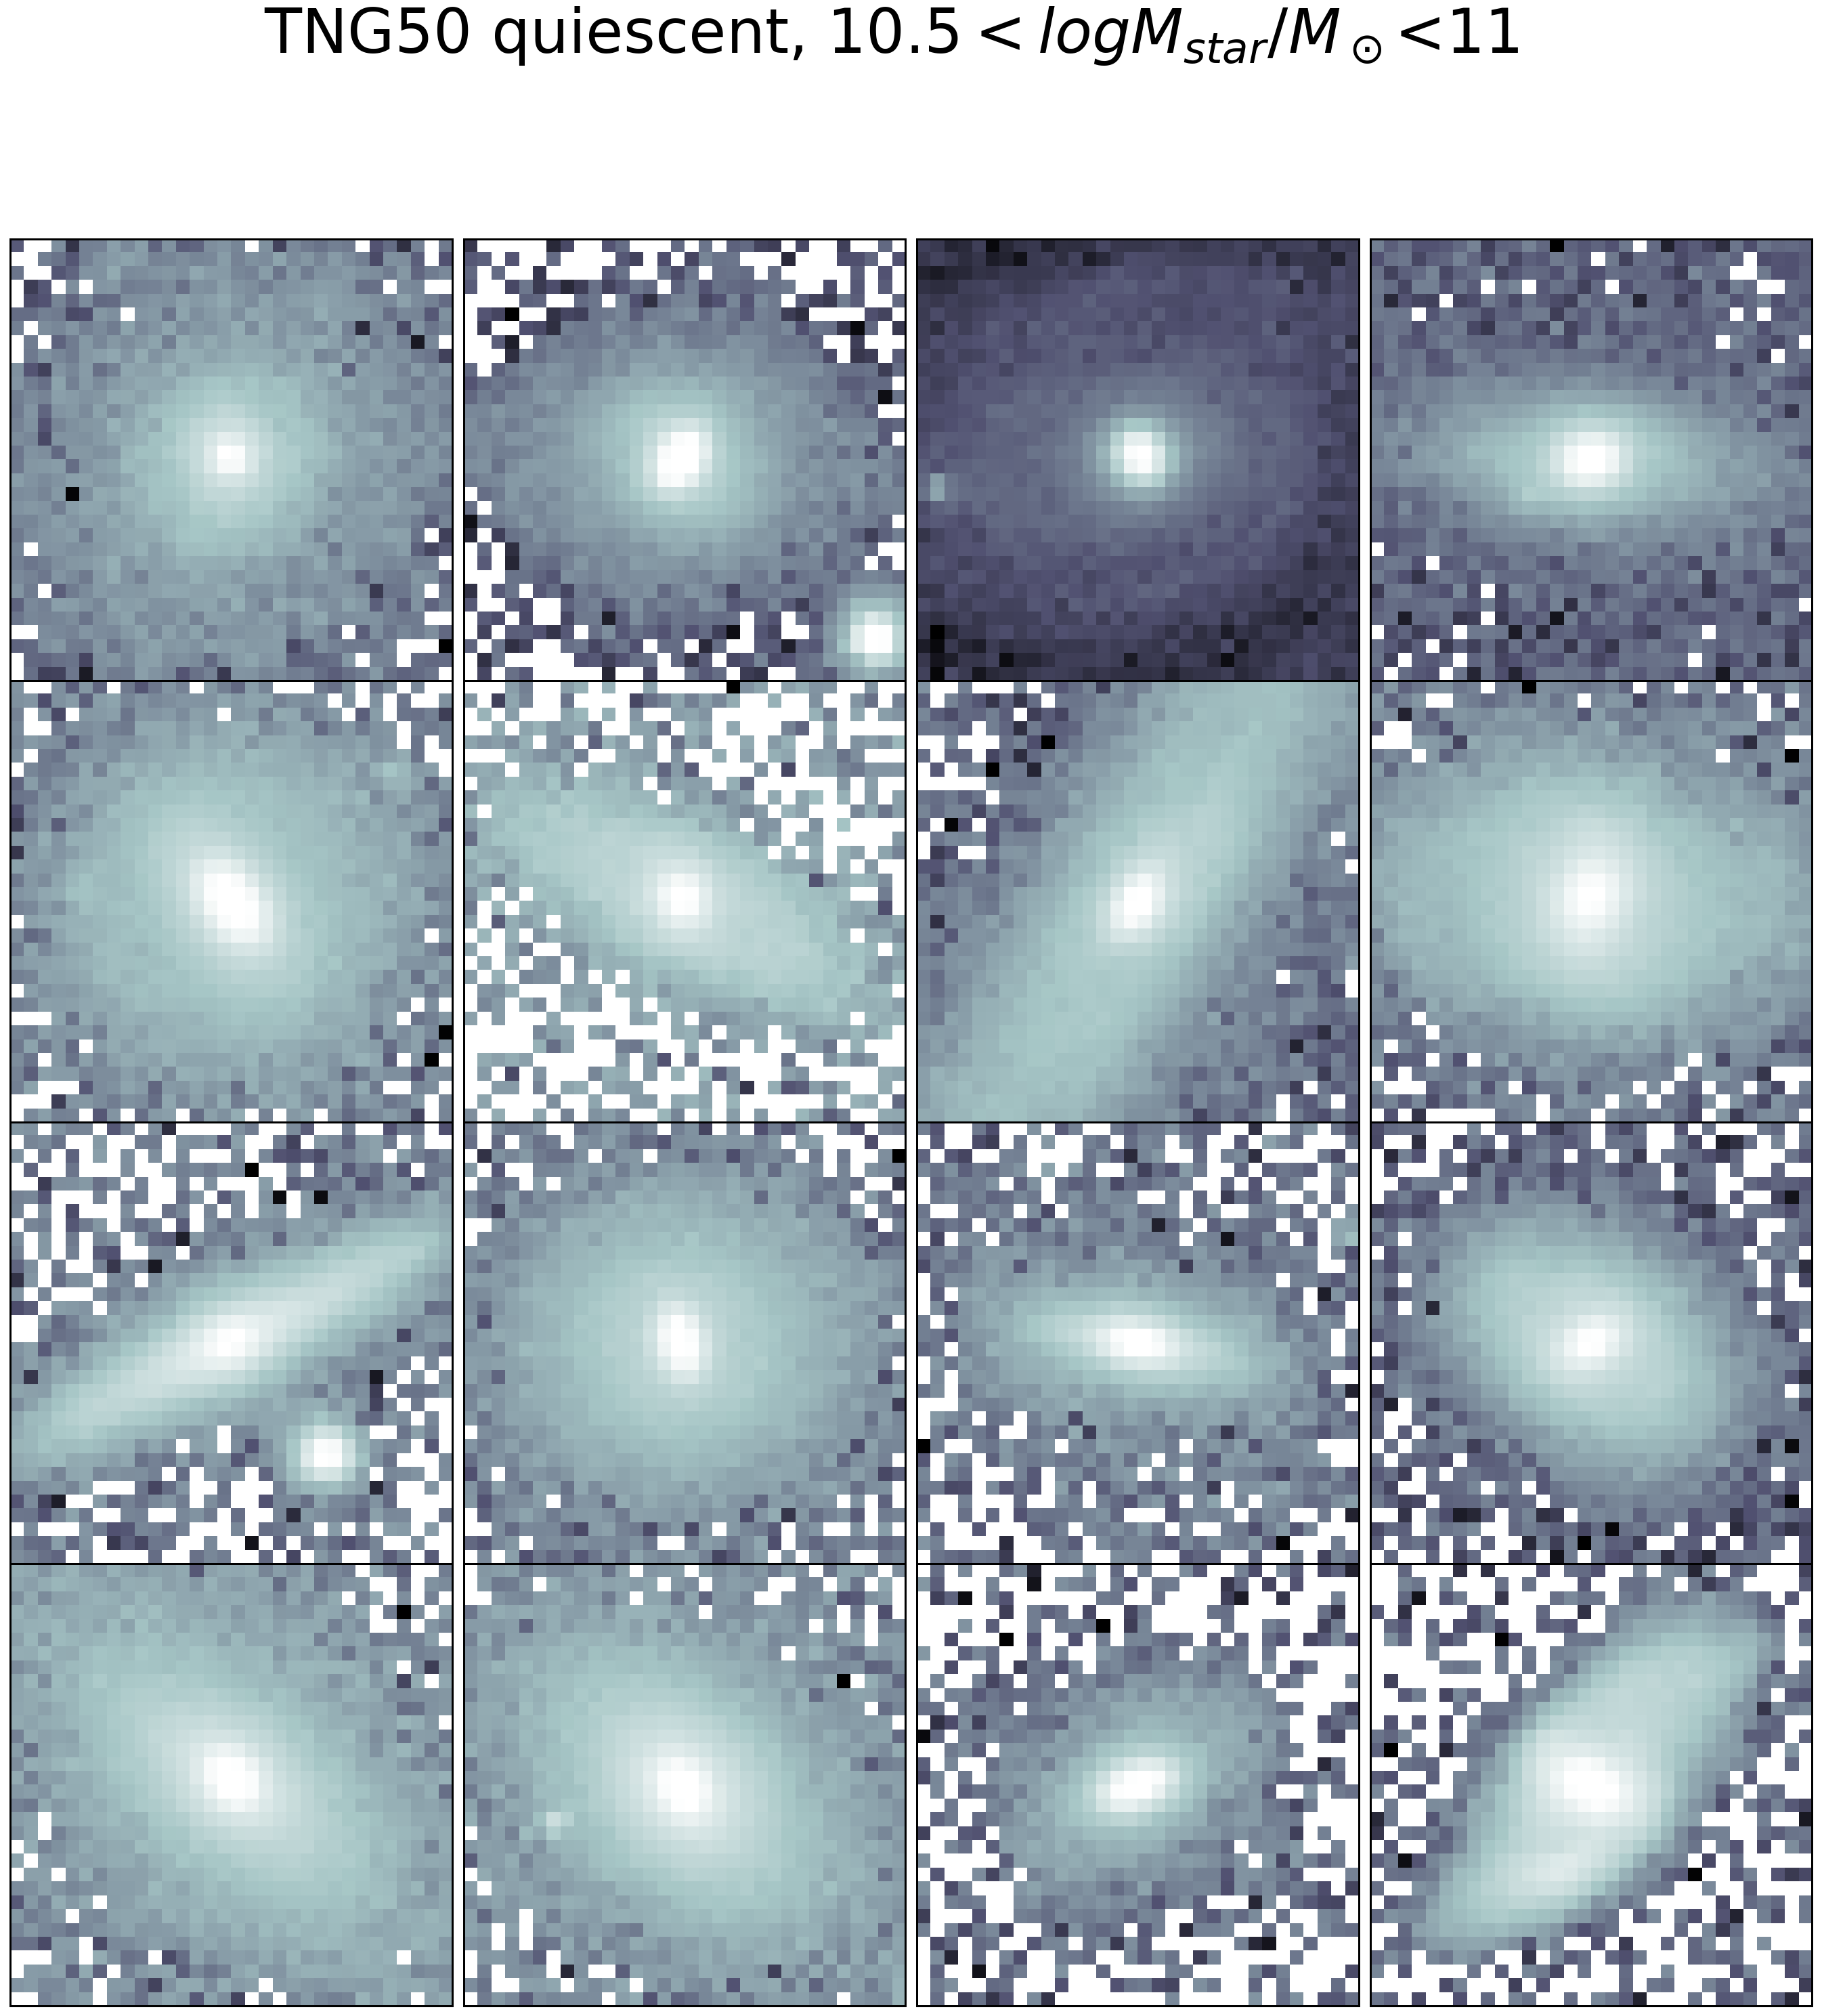

In [94]:
masslow = 10.5
massup = 11
size = 16
df_50_ = TNG50.query('Mstar>{} & Mstar<{} & sSFR<-11'.format(masslow,massup))
index = df_50_.index
ind = np.random.choice( index, replace=False, size=size)
d = data50[ind,:,:]

fig, ax = plt.subplots(4,4, figsize=(48,48))

for im,t in zip(d,ax.ravel()):
    t.imshow(im, cmap='bone', norm=colors.LogNorm())
    t.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # 
plt.subplots_adjust(hspace=0,wspace=0)
fig.suptitle(f' TNG50 quiescent, {masslow}''$<logM_{star}/M_\odot$<'f'{massup}', fontsize=90)#.format(masslow, massup), fontsize=90)
plt.savefig('/scratch/lzanisi/pixel-cnn/analysis/results/MassCutsExploration/TNG50_Q_{}_{}.pdf'.format(masslow,massup))


In [46]:
ids_df = pd.DataFrame({'objid':ids_SDSS,'index_orig':np.arange(len(ids_SDSS))})
ids_df_ = ids_df.merge(SDSS['objid'], on='objid')

In [50]:
ids_SDSS_ = ids_SDSS[ids_df_['index_orig']]
dataSDSS_ = dataSDSS[ids_df_['index_orig']]

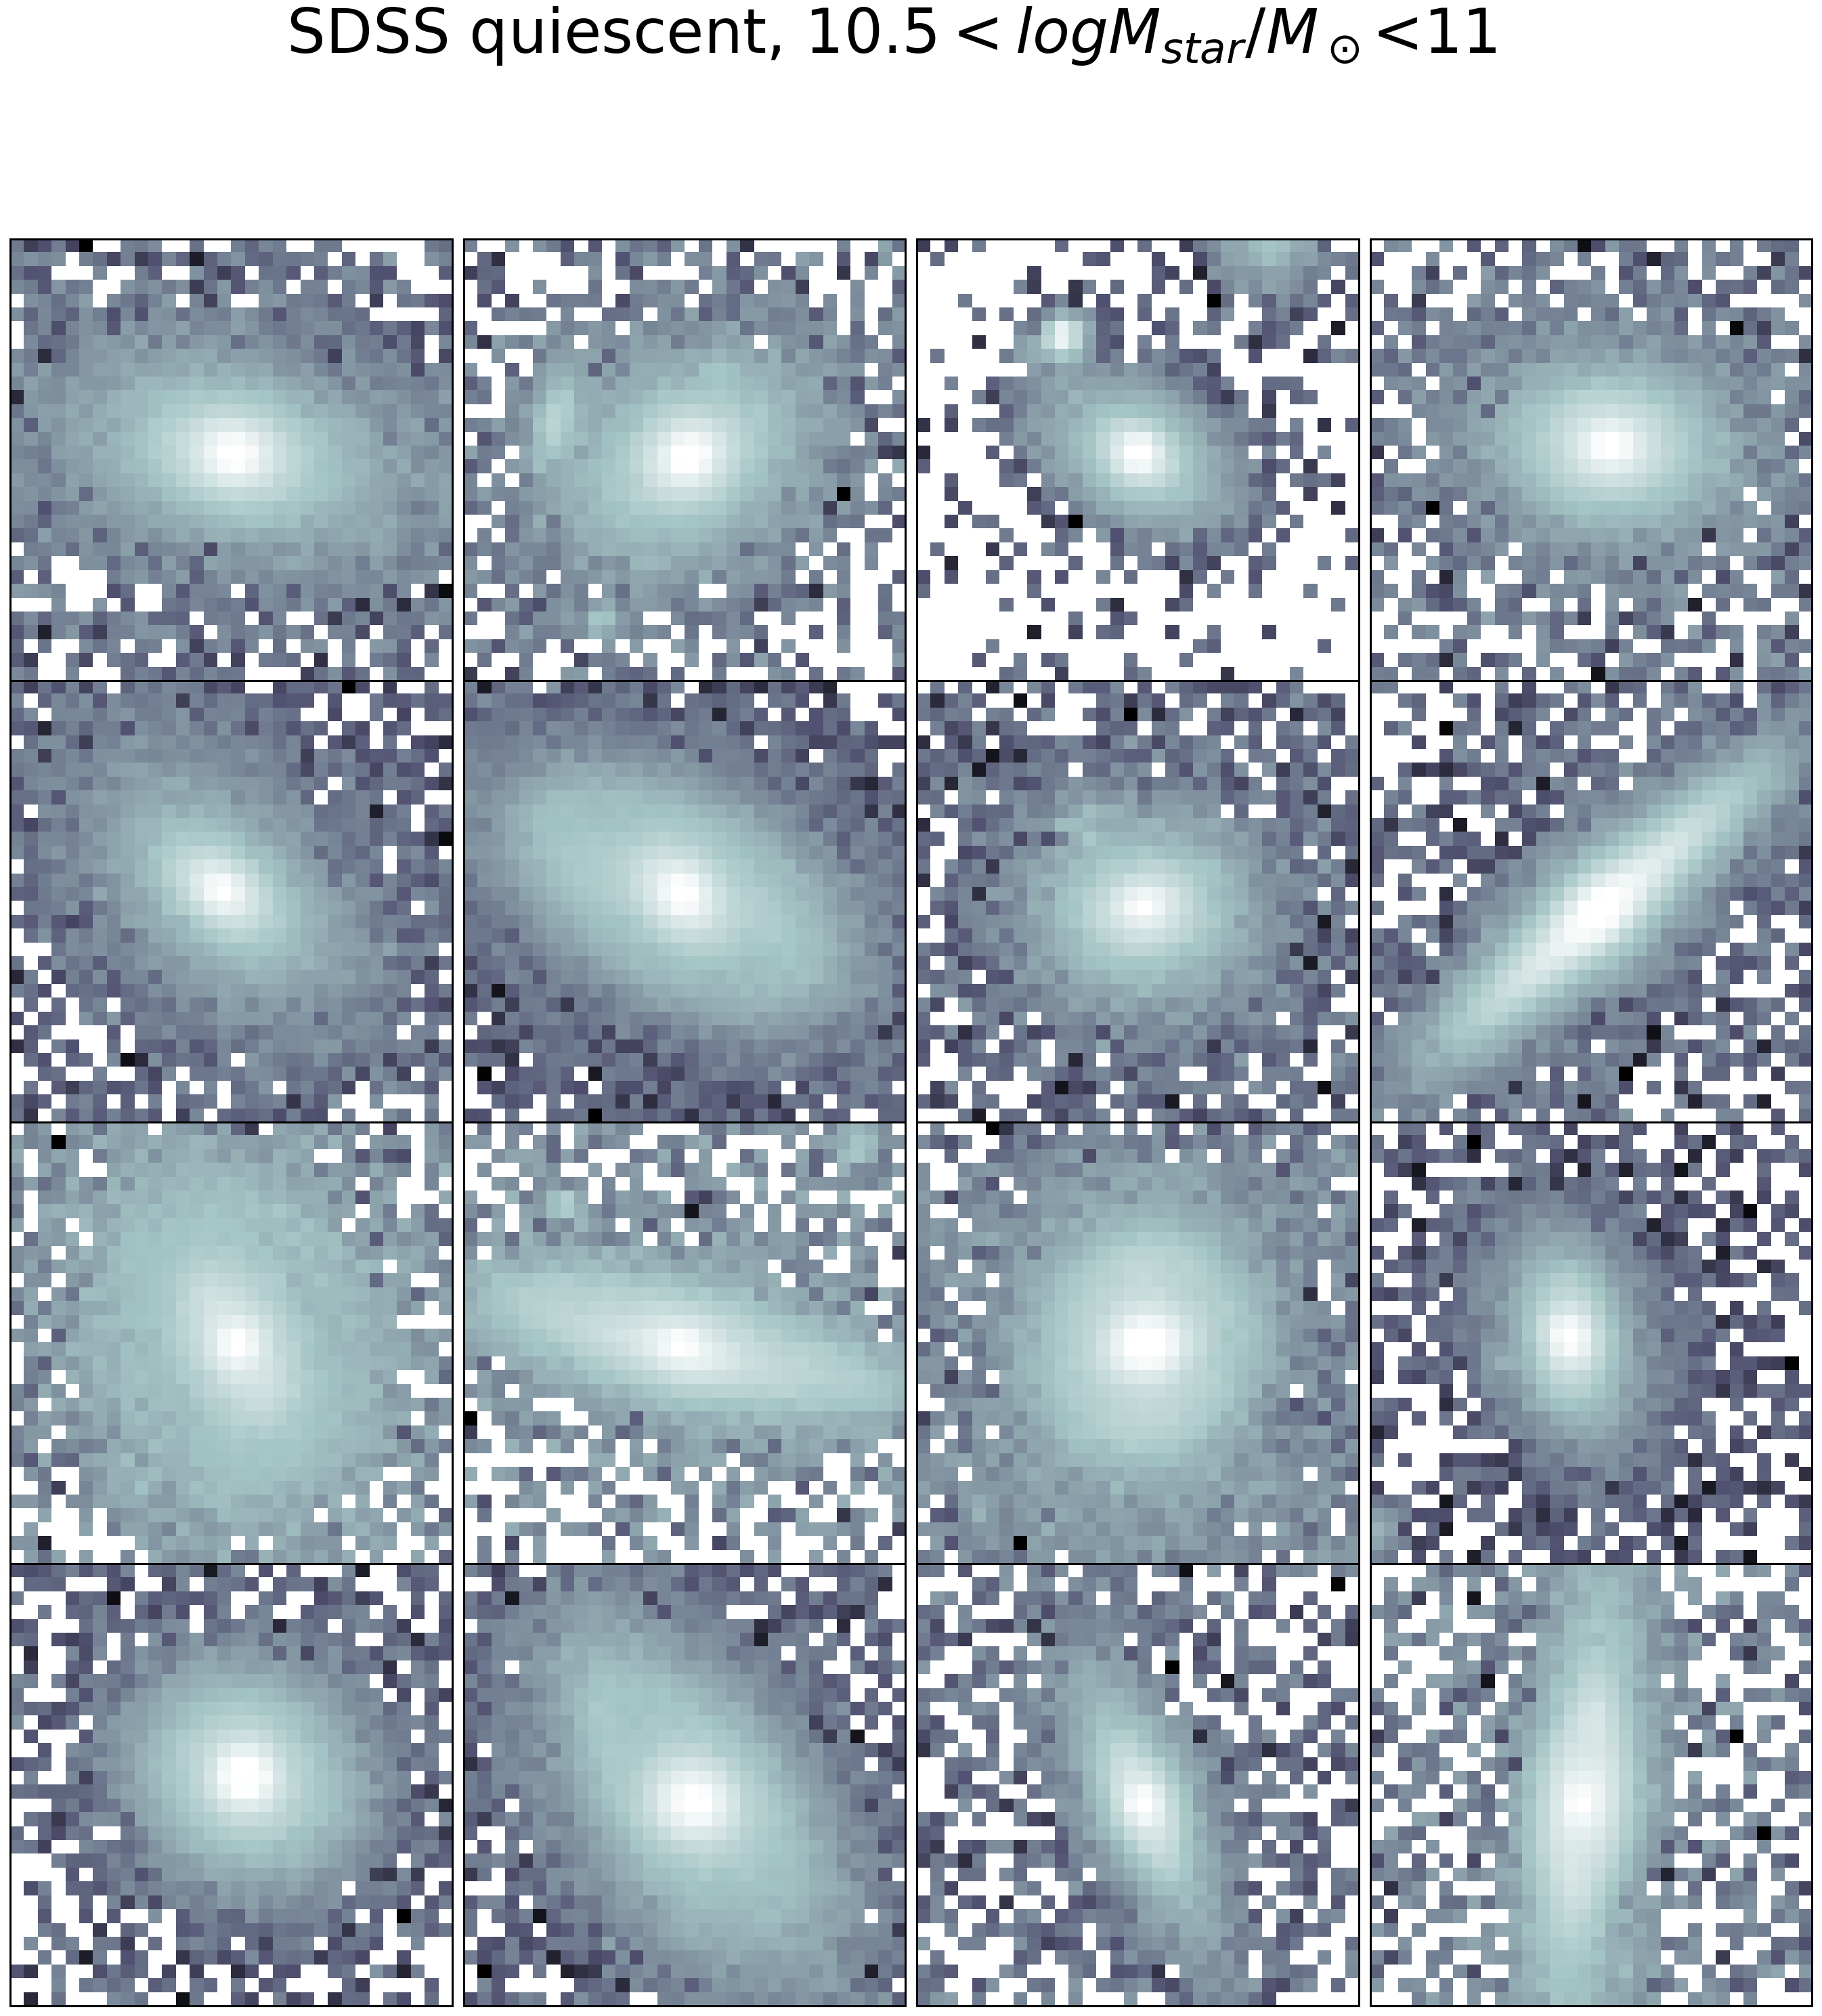

In [92]:
masslow = 10.5
massup = 11
size = 16
SDSS_ = SDSS.query('Mstar>{} & Mstar<{} & sSFR<-11  '.format(masslow,massup))
index = SDSS_.index
ind = np.random.choice( index, replace=False, size=size)
d = dataSDSS_[ind,:,:]

fig, ax = plt.subplots(4,4, figsize=(48,48))

for im,t in zip(d,ax.ravel()):
    t.imshow(im, cmap='bone', norm=colors.LogNorm())
    t.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # 
plt.subplots_adjust(hspace=0,wspace=0)
fig.suptitle(f' SDSS quiescent, {masslow}''$<logM_{star}/M_\odot$<'f'{massup}',fontsize=90)
plt.savefig('/scratch/lzanisi/pixel-cnn/analysis/results/MassCutsExploration/SDSS_Q_{}_{}.pdf'.format(masslow,massup))

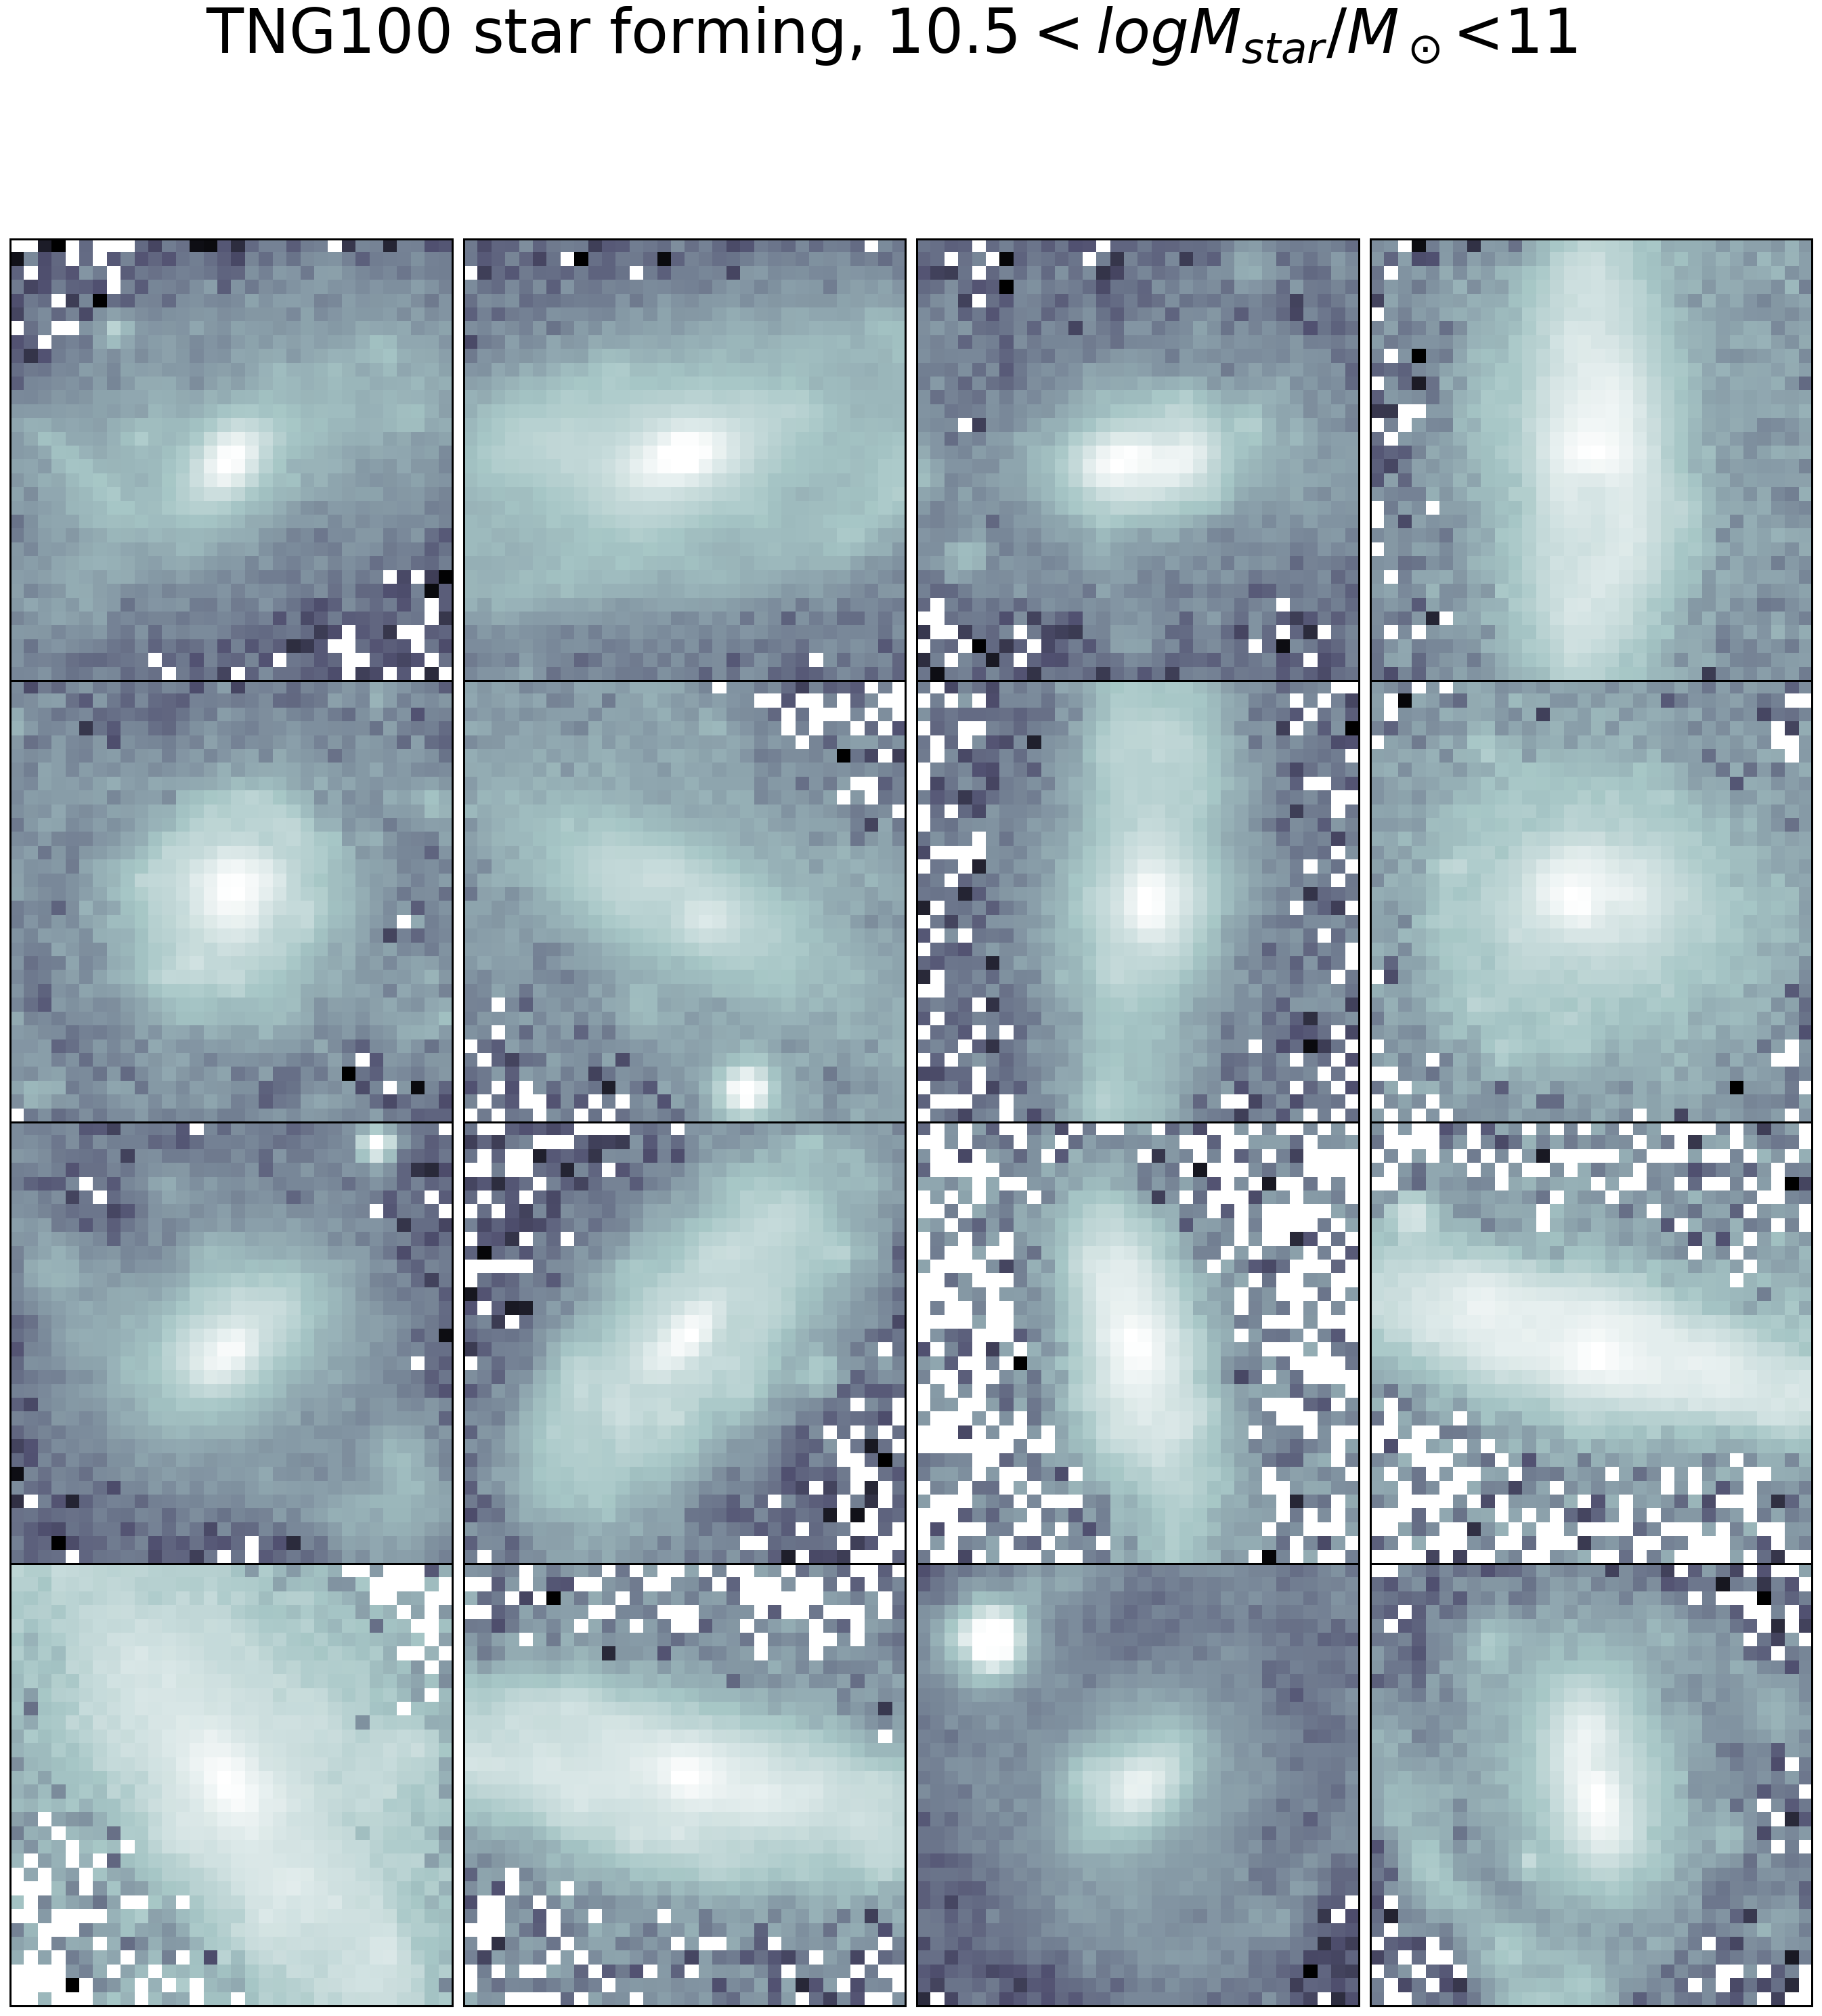

In [88]:
masslow = 10.5
massup = 11
size = 16
df_50_ = TNG.query('Mstar>{} & Mstar<{} & sSFR>-11'.format(masslow,massup))
index = df_50_.index
ind = np.random.choice( index, replace=False, size=size)
d = dataTNG[ind,:,:]

fig, ax = plt.subplots(4,4, figsize=(48,48))

for im,t in zip(d,ax.ravel()):
    t.imshow(im, cmap='bone', norm=colors.LogNorm())
    t.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # 
plt.subplots_adjust(hspace=0,wspace=0)
fig.suptitle(f' TNG100 star forming, {masslow}''$<logM_{star}/M_\odot$<'f'{massup}', fontsize=90)#.format(masslow, massup), fontsize=90)
plt.savefig('/scratch/lzanisi/pixel-cnn/analysis/results/MassCutsExploration/TNG100_SF_{}_{}.pdf'.format(masslow,massup))


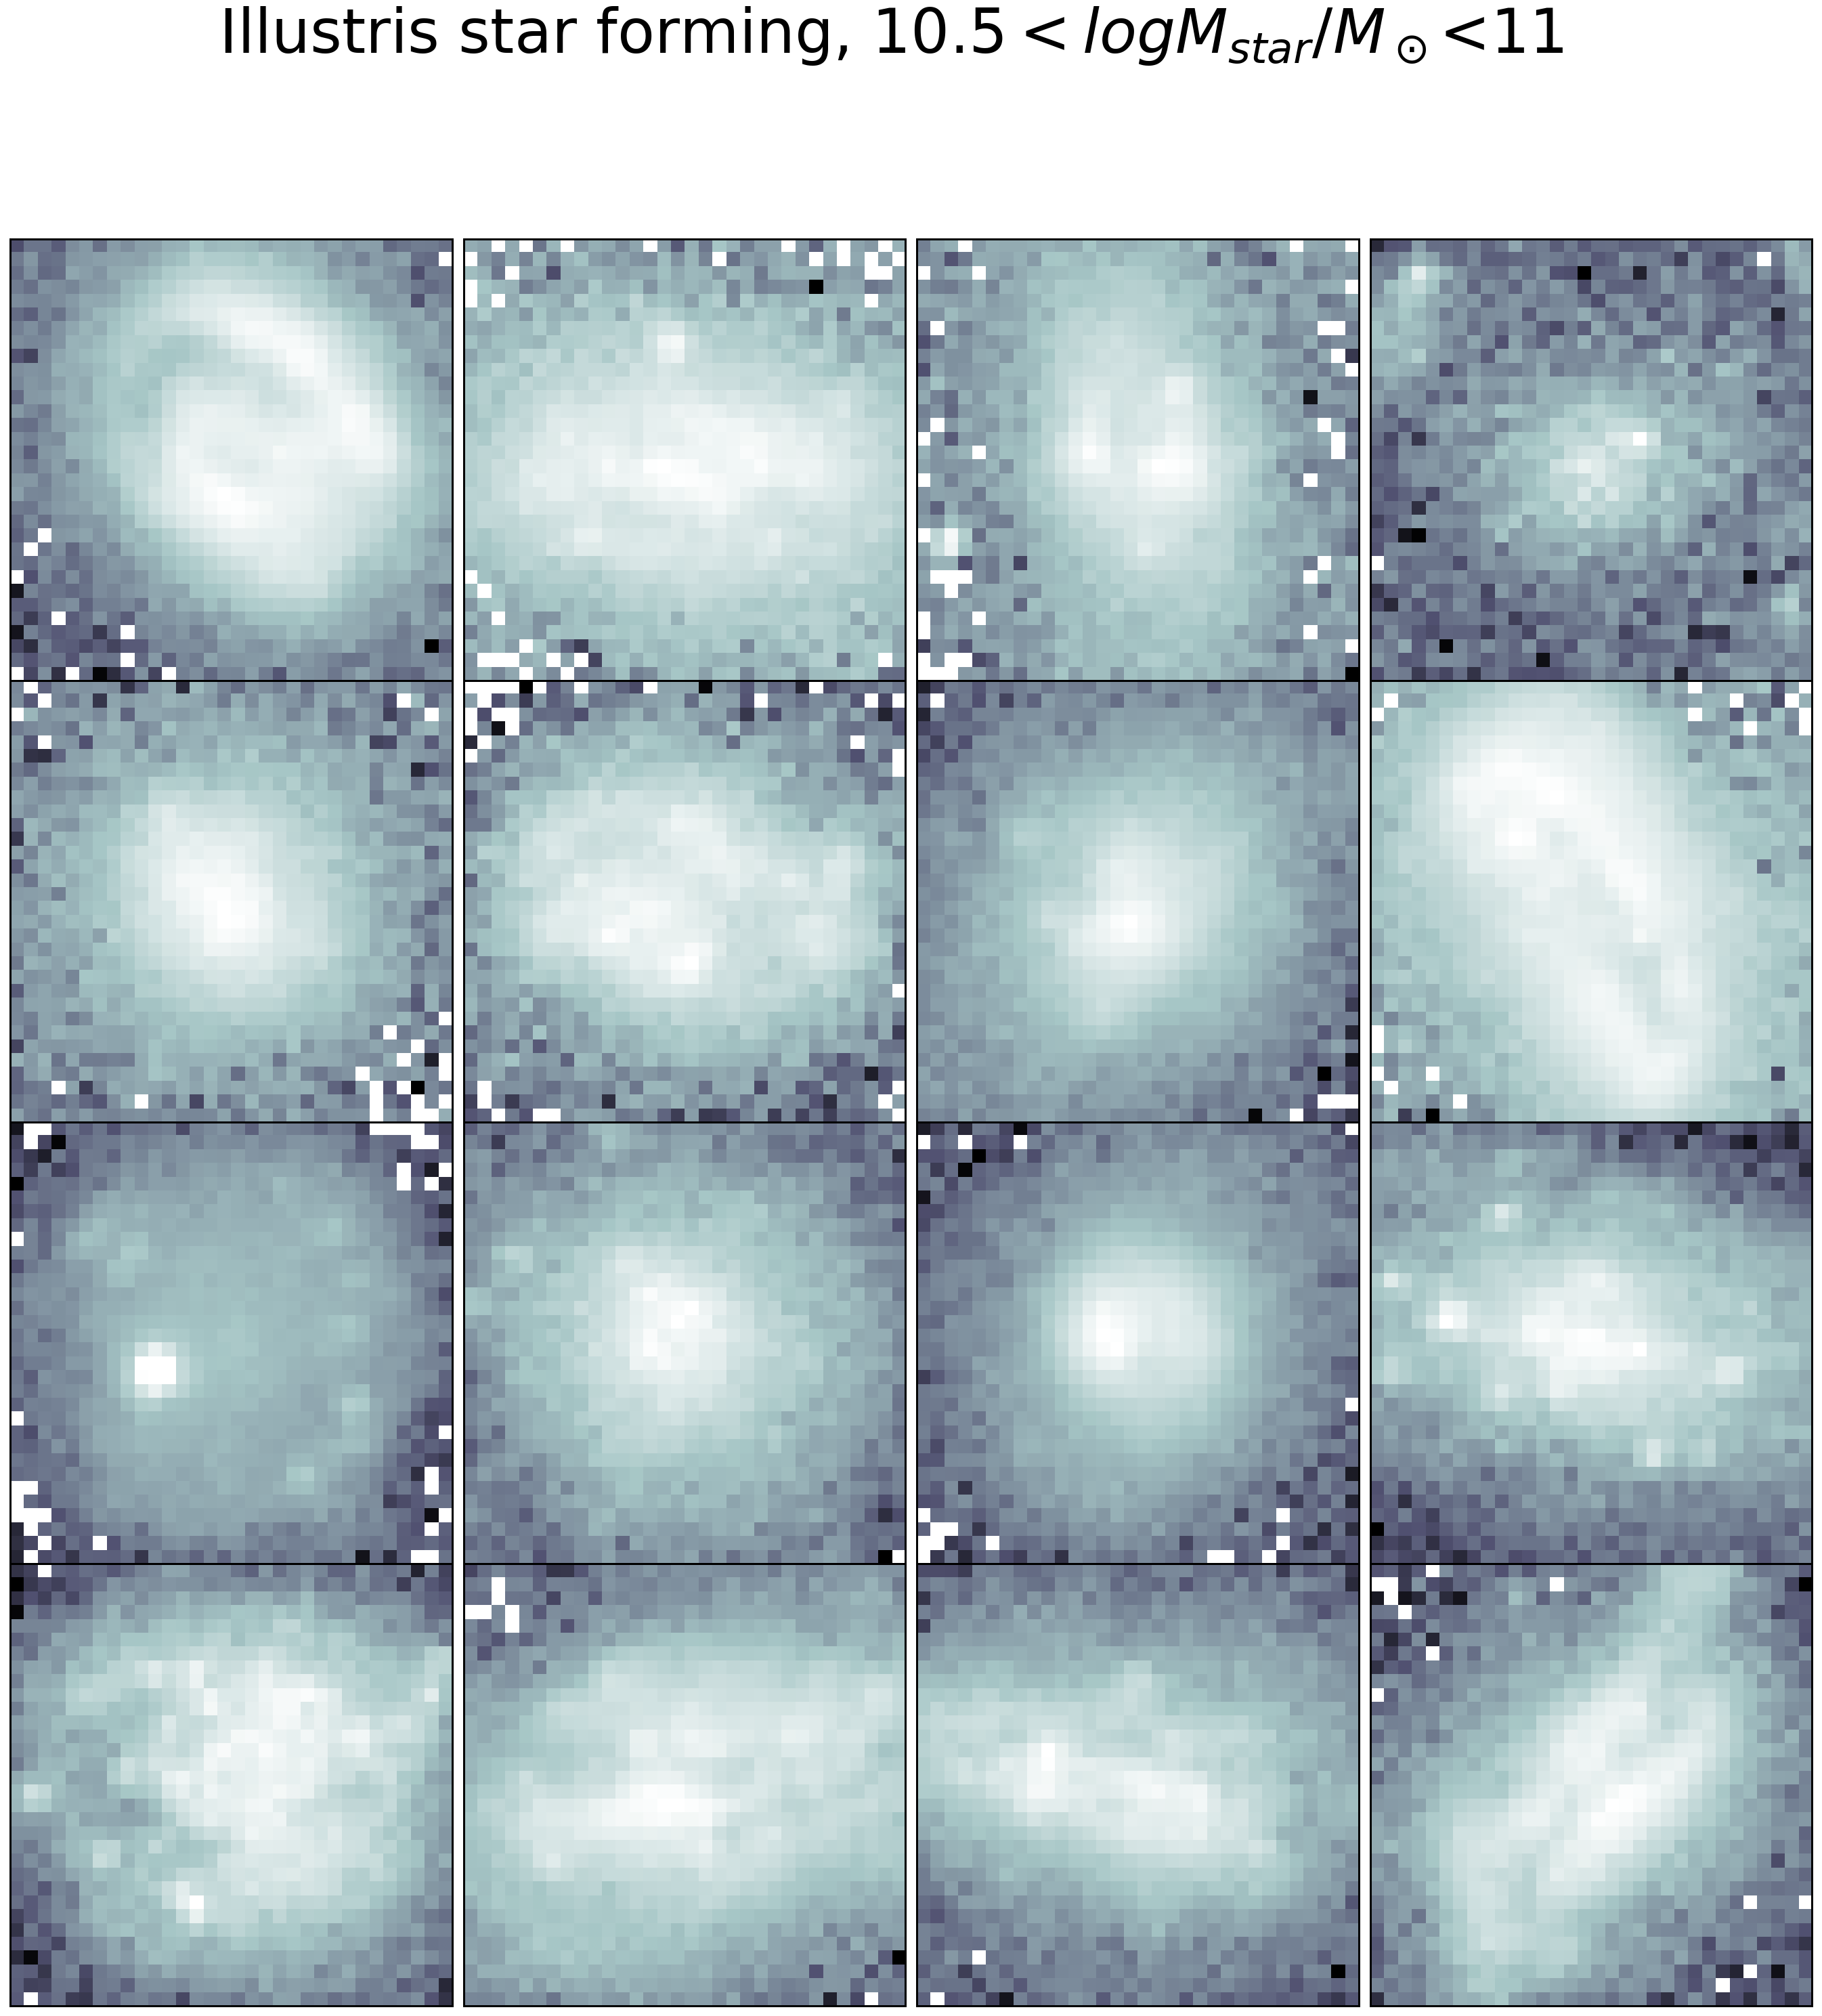

In [90]:
masslow = 10.5
massup = 11
size = 16
df_50_ = Illustris.query('Mstar>{} & Mstar<{} & sSFR>-11'.format(masslow,massup))
index = df_50_.index
ind = np.random.choice( index, replace=False, size=size)
d = dataIllustris[ind,:,:]

fig, ax = plt.subplots(4,4, figsize=(48,48))

for im,t in zip(d,ax.ravel()):
    t.imshow(im, cmap='bone', norm=colors.LogNorm())
    t.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    left=False,
    labelleft=False) # 
plt.subplots_adjust(hspace=0,wspace=0)
fig.suptitle(f' Illustris star forming, {masslow}''$<logM_{star}/M_\odot$<'f'{massup}', fontsize=90)#.format(masslow, massup), fontsize=90)
plt.savefig('/scratch/lzanisi/pixel-cnn/analysis/results/MassCutsExploration/Illustris_SF_{}_{}.pdf'.format(masslow,massup))
